In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

Analisando os resultados do banco criado

In [8]:
path_banco = '../bancos_prontos/bancos_csv/poluicao_cmip.csv'
banco_poluicao = pd.read_csv(path_banco)
banco_poluicao.head(3)

code_mn name_mn abbrv_s        date      tasmax      tasmin
0  2611606  Recife      PE  1850-01-16  299.565796  298.143860
1  2611606  Recife      PE  1850-02-15  299.787537  298.054504
2  2611606  Recife      PE  1850-03-16  300.734985  299.139862

In [10]:
jan2010 = banco_poluicao[(banco_poluicao["date"] == "1850-01-16")]
jan2010.head(3)

code_mn name_mn abbrv_s        date      tasmax     tasmin
0  2611606  Recife      PE  1850-01-16  299.565796  298.14386

In [11]:
path_mun = "../malha2022/Brazil_2022.shp"
municipios = gpd.read_file(path_mun)
municipios = municipios.filter(items=['code_mn', 'geometry'])
municipios['code_mn'] = municipios['code_mn'].astype(int)
municipios.head(3)

code_mn                                           geometry
0  1100015  POLYGON ((-61.96836 -12.13407, -62.00806 -12.1...
1  1100023  POLYGON ((-63.18281 -10.13892, -63.17933 -10.1...
2  1100031  POLYGON ((-60.70518 -13.32474, -60.52408 -13.3...

In [12]:
jan2010 = pd.merge(municipios, jan2010, on = ["code_mn"], how = "right")

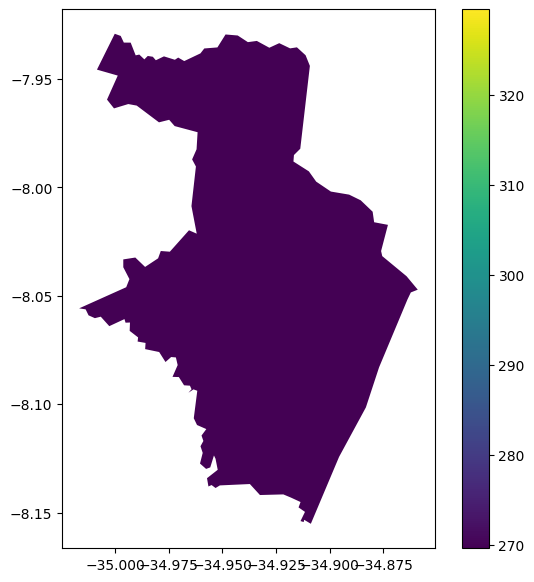

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
jan2010.plot(
    column='tasmax', 
    cmap='viridis', 
    linewidth=0.01, 
    ax=ax, 
    edgecolor='none', 
    legend=True
)
plt.savefig("../graficos/mapeamento_hcl_jan2010.png", format='png')
plt.show()